In [1]:
import math
import numpy as np
import os
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
def get_lines_from_file(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    return lines

In [3]:
lines=get_lines_from_file("/Users/adithyabandi/AllExecutionI.csv")

In [4]:
j=0
types=[]
estops=[]
pre_thres=[]
rec_thres=[]
split=[]
acc=[]
pre=[]
rec=[]
f1=[]
i=0
while i<len(lines):
    g=lines[i]
    temp=g.split("-")
    types.append(temp[0])
    estops.append(temp[1])
    pre_thres.append(temp[2])
    rec_thres.append(temp[3])
    split.append(temp[4])
    i+=2
    acc.append(float(lines[i])*100)
    i+=1
    f1.append(float(lines[i])*100)
    i+=1
    pre.append(float(lines[i])*100)
    i+=1
    rec.append(float(lines[i])*100)
    i+=1
    j+=1
    i+=1

In [5]:
Results=pd.DataFrame({'type':types,'early_stop':estops,
                      'pre_threshold':pre_thres,
                       'rec_threshold':rec_thres,
                       'split':split,'accuracy':acc,
                       'precision':pre,'recall':rec,
                        'f1_score':f1})

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


def display_results(feature_type,early_stop):
    object_Results=Results[Results.type==feature_type]
    object_Results=object_Results[object_Results.early_stop==early_stop]
    object_Results_grouped=object_Results.groupby(['type','early_stop','pre_threshold','rec_threshold'])
    display(object_Results_grouped.mean().sort_values(by=["f1_score"],ascending=False))
    object_Results_grouped_df=object_Results_grouped.aggregate(np.mean)
    object_Results_grouped_df=object_Results_grouped_df.reset_index()
    data_pivoted = object_Results_grouped_df[object_Results_grouped_df.early_stop==early_stop].pivot("pre_threshold", "rec_threshold", "f1_score")
    ax = sns.heatmap(data_pivoted)
    plt.show()

With Early Stop set as False
rgb results:


accuracy   f1_score  precision  \
type early_stop pre_threshold rec_threshold                                    
rgb  False      50            50             91.993056  90.219246  92.090278   
                              25             92.979167  89.434524  91.930556   
                25            50             91.625000  88.561508  91.062500   
                              25             91.569444  87.580357  88.805556   
                75            50             81.555556  83.516865  77.743056   
                              25             81.243056  82.431548  76.993056   
                50            75             78.388889  77.899802  77.090278   
                90            50             74.722222  77.855159  71.395833   
                25            75             77.395833  76.275794  76.145833   
                90            25             72.319444  75.783730  67.069444   
                50            90             72.409722  72.342262  70.375000   
                25            90             72.569444  72.242063  71.666667   
                75            75             70.333333  71.348214  67.520833   
                              90             62.090278  63.640873  58.937500   
                90            75             59.152778  62.494048  55.458333   
                              90             58.090278  60.965278  54.909722   

                                                recall  
type early_stop pre_threshold rec_threshold             
rgb  False      50            50             91.458333  
                              25             90.277778  
                25            50             89.583333  
                              25             90.000000  
                75            50             98.541667  
                              25             97.847222  
                50            75             81.527778  
                90            50             97.638889  
                25            75             79.166667  
                90            25             98.680556  
                50            90             77.013889  
                25            90             76.458333  
                75            75             81.944444  
                              90             76.944444  
                90            75             81.944444  
                              90             77.916667

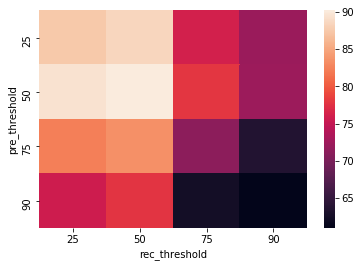

shape results:


accuracy   f1_score  precision  \
type  early_stop pre_threshold rec_threshold                                    
shape False      75            75             85.766667  78.661905  89.208333   
                               50             85.683333  77.078571  86.458333   
                               25             86.608333  76.633333  85.333333   
                 50            75             82.391667  76.550000  86.416667   
                 25            50             84.100000  75.407143  86.000000   
                               25             85.041667  75.083333  84.083333   
                 50            50             82.025000  75.033333  86.666667   
                               25             83.133333  73.666667  84.583333   
                 90            50             73.683333  72.480952  73.650000   
                 25            75             82.725000  72.428571  83.791667   
                 50            90             73.025000  70.407143  72.816667   
                 90            75             74.250000  69.834524  69.200000   
                 75            90             71.891667  67.154762  68.408333   
                 90            25             68.133333  67.107143  66.441667   
                               90             63.825000  65.883333  63.041667   
                 25            90             70.041667  65.266667  66.575000   

                                                 recall  
type  early_stop pre_threshold rec_threshold             
shape False      75            75             74.166667  
                               50             73.083333  
                               25             72.500000  
                 50            75             72.250000  
                 25            50             70.416667  
                               25             70.916667  
                 50            50             69.333333  
                               25             68.583333  
                 90            50             81.666667  
                 25            75             67.000000  
                 50            90             78.250000  
                 90            75             79.166667  
                 75            90             75.083333  
                 90            25             77.083333  
                               90             81.333333  
                 25            90             74.333333

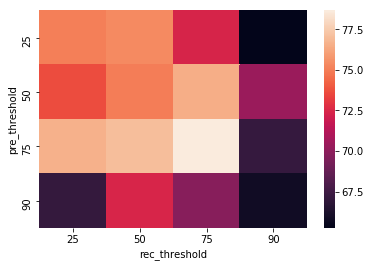

object results:


accuracy   f1_score  \
type   early_stop pre_threshold rec_threshold                         
object False      90            25             79.026042  69.426711   
                                90             75.354167  67.765253   
                                75             75.770833  67.098958   
                                50             77.002604  67.029390   
                  50            90             79.841146  66.802827   
                  75            90             77.979167  66.345982   
                  25            50             80.015625  66.340030   
                  75            25             80.572917  66.078125   
                  25            75             79.690104  66.074033   
                  75            75             78.617188  65.828125   
                  25            25             80.460938  65.735119   
                  75            50             78.289062  65.425595   
                  50            50             80.539062  65.101190   
                  25            90             78.205729  64.684896   
                  50            25             80.075521  64.623512   
                                75             78.997396  64.587054   

                                               precision     recall  
type   early_stop pre_threshold rec_threshold                        
object False      90            25             77.169271  68.020833  
                                90             73.979167  67.890625  
                                75             75.169271  66.458333  
                                50             74.614583  66.770833  
                  50            90             75.075521  64.140625  
                  75            90             75.307292  63.619792  
                  25            50             76.666667  61.718750  
                  75            25             76.250000  61.484375  
                  25            75             76.161458  61.927083  
                  75            75             76.041667  61.875000  
                  25            25             75.950521  61.145833  
                  75            50             77.070312  60.182292  
                  50            50             74.296875  61.067708  
                  25            90             73.549479  61.614583  
                  50            25             75.013021  59.921875  
                                75             75.312500  60.390625

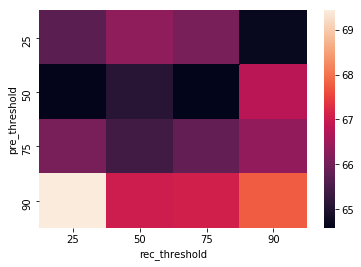

With Early Stop set as True
rgb results:


accuracy   f1_score  precision  \
type early_stop pre_threshold rec_threshold                                    
rgb  True       50            25             91.520833  89.622024  91.791667   
                              50             92.972222  89.426587  91.625000   
                25            25             91.194444  88.494048  90.500000   
                              50             90.187500  87.000992  88.826389   
                75            50             83.875000  85.859127  82.381944   
                              25             83.444444  82.979167  77.215278   
                25            75             78.201389  78.188492  77.444444   
                90            25             73.673611  77.274802  69.527778   
                              50             74.069444  77.269841  68.791667   
                50            75             77.451389  76.612103  75.840278   
                              90             70.826389  70.894841  69.034722   
                75            75             68.347222  70.042659  65.527778   
                25            90             69.479167  69.139881  66.215278   
                75            90             62.631944  64.362103  59.583333   
                90            75             61.097222  63.936508  57.131944   
                              90             57.625000  60.620040  53.722222   

                                                recall  
type early_stop pre_threshold rec_threshold             
rgb  True       50            25             90.972222  
                              50             89.791667  
                25            25             90.416667  
                              50             88.611111  
                75            50             97.152778  
                              25             97.430556  
                25            75             81.180556  
                90            25             97.986111  
                              50             98.611111  
                50            75             80.486111  
                              90             76.805556  
                75            75             81.041667  
                25            90             76.388889  
                75            90             77.986111  
                90            75             81.805556  
                              90             78.263889

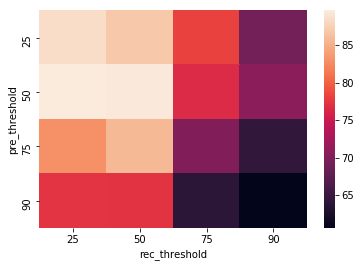

shape results:


accuracy   f1_score  precision  \
type  early_stop pre_threshold rec_threshold                                    
shape True       75            25             86.525000  78.100000  87.250000   
                 50            75             84.283333  77.483333  88.750000   
                 75            75             83.058333  76.445238  83.875000   
                 50            25             81.891667  76.400000  87.333333   
                 75            50             85.925000  75.933333  85.833333   
                 25            50             84.641667  75.450000  86.166667   
                               75             81.883333  74.195238  82.291667   
                               25             81.750000  73.250000  83.583333   
                 90            25             74.383333  72.408333  72.300000   
                               50             71.225000  71.775000  70.850000   
                               75             73.375000  71.753571  72.350000   
                 50            50             82.916667  71.166667  79.916667   
                               90             71.991667  68.253571  69.791667   
                 90            90             67.450000  66.989286  65.033333   
                 75            90             72.850000  66.734524  68.141667   
                 25            90             69.600000  64.813095  64.433333   

                                                 recall  
type  early_stop pre_threshold rec_threshold             
shape True       75            25             73.916667  
                 50            75             72.333333  
                 75            75             73.000000  
                 50            25             71.416667  
                 75            50             71.500000  
                 25            50             70.416667  
                               75             70.416667  
                               25             68.250000  
                 90            25             81.083333  
                               50             81.166667  
                               75             80.916667  
                 50            50             67.000000  
                               90             77.500000  
                 90            90             80.916667  
                 75            90             75.000000  
                 25            90             75.083333

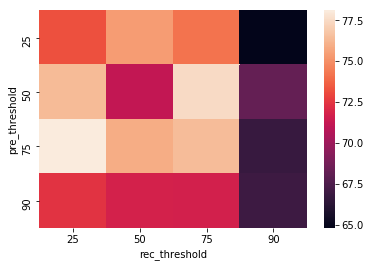

object results:


accuracy   f1_score  \
type   early_stop pre_threshold rec_threshold                         
object True       90            25             76.929688  67.404018   
                                75             77.682292  67.137277   
                  50            50             81.729167  66.620536   
                  90            90             76.320313  66.203869   
                  25            50             79.395833  65.984375   
                  50            90             78.148438  65.962798   
                  90            50             76.489583  65.852679   
                  75            50             79.835938  65.783482   
                  25            25             79.533854  65.727679   
                  75            90             77.544271  65.536086   
                  25            90             79.218750  65.484375   
                  50            25             80.026042  65.278274   
                  75            25             80.723958  65.253720   
                  50            75             79.158854  65.081845   
                  75            75             78.367188  64.097470   
                  25            75             78.614583  63.991815   

                                               precision     recall  
type   early_stop pre_threshold rec_threshold                        
object True       90            25             74.445312  67.057292  
                                75             73.760417  66.927083  
                  50            50             76.835938  62.005208  
                  90            90             73.195312  66.510417  
                  25            50             76.328125  61.250000  
                  50            90             74.973958  63.151042  
                  90            50             71.979167  66.406250  
                  75            50             75.364583  61.640625  
                  25            25             77.122396  60.625000  
                  75            90             74.953125  62.734375  
                  25            90             73.078125  63.619792  
                  50            25             75.416667  60.859375  
                  75            25             75.039062  60.859375  
                  50            75             73.828125  61.953125  
                  75            75             73.893229  60.312500  
                  25            75             74.015625  59.765625

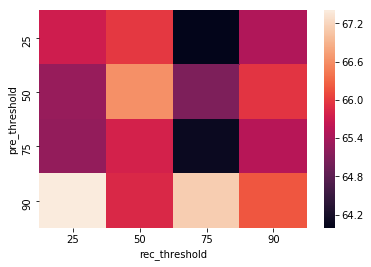

In [8]:
feature_types=["rgb","shape","object"]
early_stops=["False","True"]
for early_stop in early_stops:
    print("With Early Stop set as",early_stop)
    for feature_type in feature_types:
        print(feature_type,"results:")
        display_results(feature_type,early_stop)